# Завдання

*Завдання 1: Завантажте MNIST. Розбийте його на навчальну, валідаційну та тренувальну вибірку. Застосуйте PCA для зменшення розмірності.*

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

Розбиваємо його на навчальну, валідаційну та тренувальну вибірку.

In [2]:
X_train = X[:50000]
y_train = y[:50000]
X_test = X[60000:]
y_test = y[60000:]

X_val = X[50000:60000]
y_val = y[50000:60000]

In [10]:
print(f"X_train.shape = {X_train.shape}")

X_train.shape = (50000, 784)


Після розбиття застовуємо PCA.

In [10]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print("Нова розмірність X_train після PCA:", X_train_pca.shape)
print("Нова розмірність X_val після PCA:", X_val_pca.shape)
print("Нова розмірність X_test після PCA:", X_test_pca.shape)

Нова розмірність X_train після PCA: (50000, 154)
Нова розмірність X_val після PCA: (10000, 154)
Нова розмірність X_test після PCA: (10000, 154)


Розмірність зменшилася на 630 вимірів.

*Завдання 2: Кластеризуйте датасет, використовуючи K-Means. Знайдіть оптимальну кількість кластерів*

Для визначення оптимальної кількості кластерів скористаємось оцінкою силуету. Цей метод потребує всього датасету.

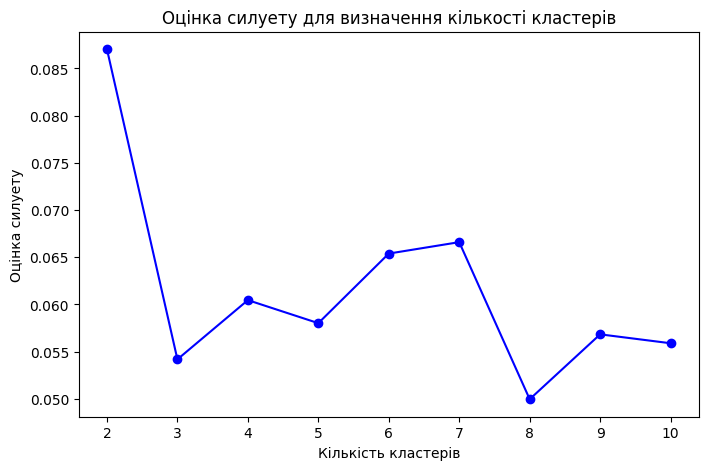

In [12]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("Кількість кластерів")
plt.ylabel("Оцінка силуету")
plt.title("Оцінка силуету для визначення кількості кластерів")
plt.show()

З графіку можна сказати, що найкращий тип розбиття відбувається на 2 кластери - тоді коефіцієнт силуетів близький до 1.
Ще непоганий результат, коли кластерів 6 або 7.

Візуалізуємо це за допомогою PCA.

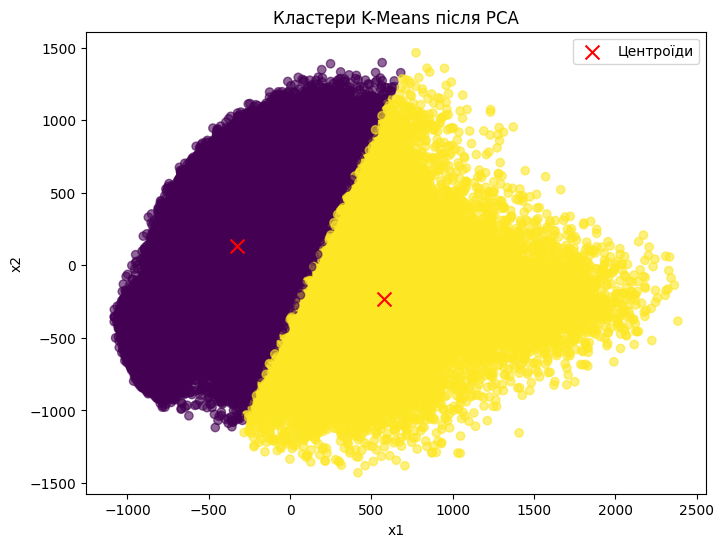

In [24]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Центроїди')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Кластери K-Means після PCA")
plt.legend()
plt.show()

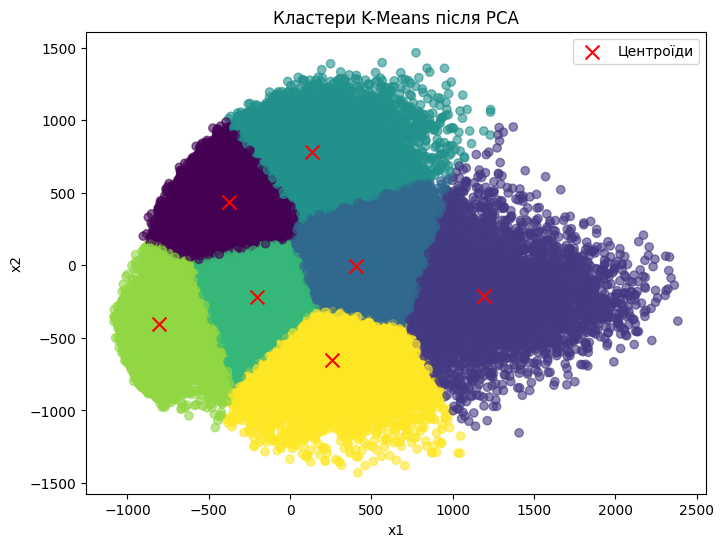

In [27]:
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Центроїди')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Кластери K-Means після PCA")
plt.legend()
plt.show()

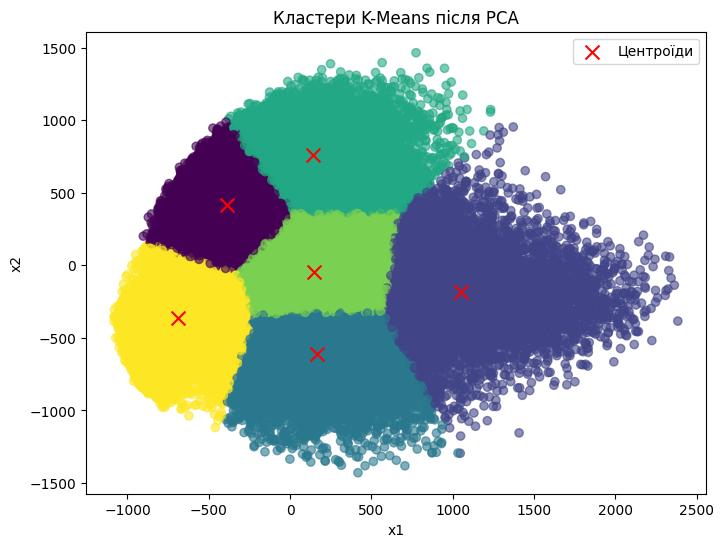

In [28]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Центроїди')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Кластери K-Means після PCA")
plt.legend()
plt.show()